In [1]:
# 尝试导入主要模块
import openfe
import openmm
%matplotlib inline

print("✅ OpenFE版本:", openfe.__version__)
print("✅ OpenMM版本:", openmm.__version__)
print("✅ 所有核心模块导入成功！")

/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openmmtools/integrators.py:2328: SyntaxWarning: invalid escape sequence '\i'
  Velocity relaxation parameter, alpha \in (0,1).
/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openmmtools/states.py:837: SyntaxWarning: invalid escape sequence '\m'
  u = \beta [U(x) + p V(x) + \mu N(x) - \gamma A]
/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openmmtools/storage/iodrivers.py:88: SyntaxWarning: "is not" with 'str' literal. Did you mean "!="?
  return '/'.join([path_part.strip('/ ') for path_part in split_path if path_part is not ''])
/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openmmtools/storage/iodrivers.py:703: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if self._output_mode is 'a':


✅ OpenFE版本: 1.8.0
✅ OpenMM版本: 8.2
✅ 所有核心模块导入成功！


/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openmmtools/multistate/multistateanalyzer.py:965: SyntaxWarning: invalid escape sequence '\l'
  u_n = - \ln \pi(x_n) + c
/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openmmtools/multistate/multistateanalyzer.py:1025: SyntaxWarning: invalid escape sequence '\s'
  N = \sum_k N_k. note this is not N'
/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openmmtools/multistate/multistateanalyzer.py:1420: SyntaxWarning: invalid escape sequence '\l'
  u_n = - \ln \pi(x_n) + c
/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openmmtools/multistate/multistateanalyzer.py:1493: SyntaxWarning: invalid escape sequence '\s'
  The \sum samples_per_state = N.


In [2]:
from rdkit import Chem

# 导入数据
file_path_ligand_a_mol = 'data/outputs/preprocessed/PyAutoFep/lig_data/FXR_12_molecule_complex/FXR_12.mol'

file_path_ligand_b_mol = 'data/outputs/preprocessed/PyAutoFep/lig_data/FXR_74_molecule_complex/FXR_74.mol'

# 读取分子数据
ligand_a_mol = Chem.MolFromMolFile(file_path_ligand_a_mol)
ligand_b_mol = Chem.MolFromMolFile(file_path_ligand_b_mol)

In [3]:
from openff.toolkit import Molecule
from openfe import SmallMoleculeComponent

from_rdmol_a = Molecule.from_rdkit(ligand_a_mol)
from_rdmol_b = Molecule.from_rdkit(ligand_b_mol)


# Now pass these to form Molecules
ligand_mol_a = SmallMoleculeComponent.from_openff(from_rdmol_a)
ligand_mol_b = SmallMoleculeComponent.from_openff(from_rdmol_b)

ligand_mols = [ligand_mol_a, ligand_mol_b]
print(type(ligand_mol_a))

<class 'gufe.components.smallmoleculecomponent.SmallMoleculeComponent'>


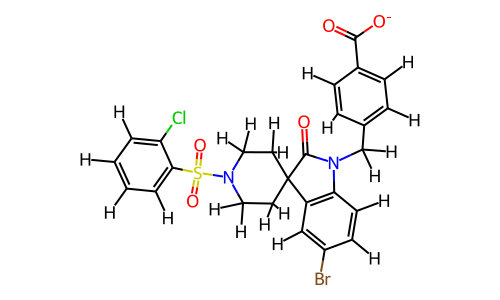

In [4]:
from_rdmol_a.visualize()

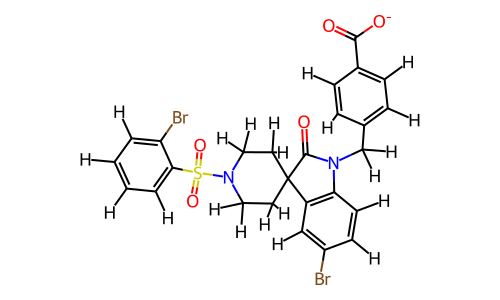

In [5]:
from_rdmol_b.visualize()

In [6]:
# 制作原子图

# from openfe.setup import LomapAtomMapper
# mapper = LomapAtomMapper()
# lomap_mapping = next(mapper.suggest_mappings(ligand_mol_a, ligand_mol_b))

In [7]:
# We can display the atom mapping in 2D by calling it
# lomap_mapping
# Visualize the mapping in 3D
# lomap_mapping.view_3d(show_atomIDs=True)

In [8]:
from kartograf import KartografAtomMapper
# Build Kartograf Atom Mapper
mapper = KartografAtomMapper(atom_map_hydrogens=True)

# Get Mapping
kartograf_mapping = next(mapper.suggest_mappings(ligand_mol_a, ligand_mol_b))

no mapping could be found, after applying filters!


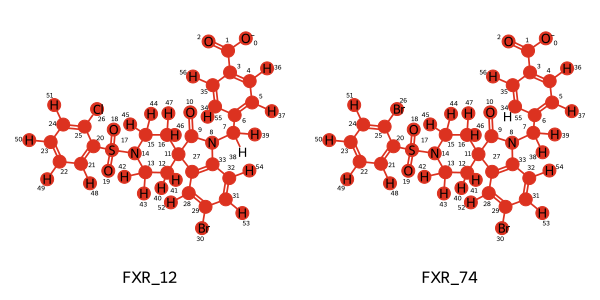

In [9]:
# We can display the atom mapping in 2D by calling it
kartograf_mapping

In [10]:
# Create network from the two molecules
import openfe
from openfe.setup.ligand_network_planning import generate_radial_network
from openfe.setup.ligand_network_planning import generate_minimal_spanning_network
from openfe.setup.ligand_network_planning import generate_lomap_network
from openfe.setup import LomapAtomMapper

# Create an MST network
mst_network = generate_minimal_spanning_network(
    ligands=ligand_mols,
    scorer=openfe.lomap_scorers.default_lomap_score,
    mappers=[KartografAtomMapper(atom_map_hydrogens=True),])

# Create a LOMAP network
lomap_network = generate_lomap_network(
    ligands=ligand_mols,
    scorer=openfe.lomap_scorers.default_lomap_score,
    mappers=[KartografAtomMapper(atom_map_hydrogens=True),])

# Create a radial, choosing the first ligand as central ligand
radial_network = generate_radial_network(
    ligands=ligand_mols[1:],
    central_ligand=ligand_mols[0],
    mappers=[KartografAtomMapper(atom_map_hydrogens=True),])

no mapping could be found, after applying filters!
no mapping could be found, after applying filters!
no mapping could be found, after applying filters!


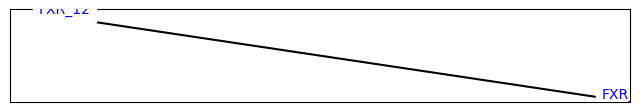

In [11]:
# Visualize the MST network
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(mst_network)

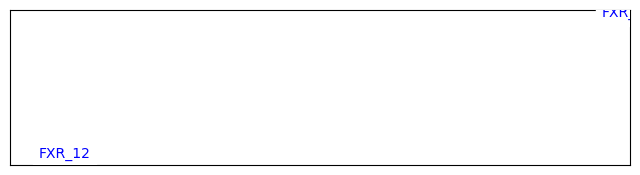

In [12]:
# Visualize the LOMAP network
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(lomap_network)



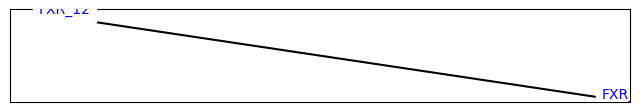

In [13]:
# Visualize the radial network
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(radial_network)



In [14]:
mst_edges = [edge for edge in mst_network.edges]

# Pick an edge
edge = mst_edges[0]

# Print the smiles of the molecules and the mapping
print("molecule A smiles: ", edge.componentA.smiles)
print("molecule B smiles: ", edge.componentB.smiles)
print("map between molecule A and B: ", edge.componentA_to_componentB)



molecule A smiles:  O=C([O-])c1ccc(CN2C(=O)C3(CCN(S(=O)(=O)c4ccccc4Cl)CC3)c3cc(Br)ccc32)cc1
molecule B smiles:  O=C([O-])c1ccc(CN2C(=O)C3(CCN(S(=O)(=O)c4ccccc4Br)CC3)c3cc(Br)ccc32)cc1
map between molecule A and B:  {38: 55}


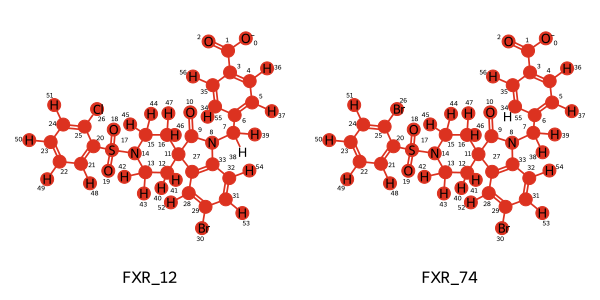

In [15]:
# We can display the atom mapping of an edge by calling it
edge

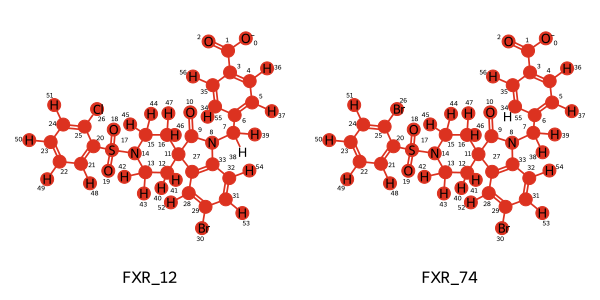

In [16]:


from IPython.display import Image

# mappings can also be saved to file if required
edge.draw_to_file('test_FXR_12_74.png')

# load it back for visualisation
Image('test_FXR_12_74.png')



In [17]:

# Convert to graphml
with open("test_network_store.graphml", "w") as writer:
    writer.write(mst_network.to_graphml())



In [18]:

# First let's define the Protein and Solvent Components which we will be using
from openfe import SolventComponent, ProteinComponent
from openff.units import unit

# 暂时屏蔽蛋白质
# protein = ProteinComponent.from_pdb_file('inputs/tyk2_protein.pdb')

# Note: the distance from the solute to add water is not defined here but in the
# the relevant RBFE solver method
solvent = SolventComponent(positive_ion='Na', negative_ion='Cl',
                           neutralize=True, ion_concentration=0.15*unit.molar)

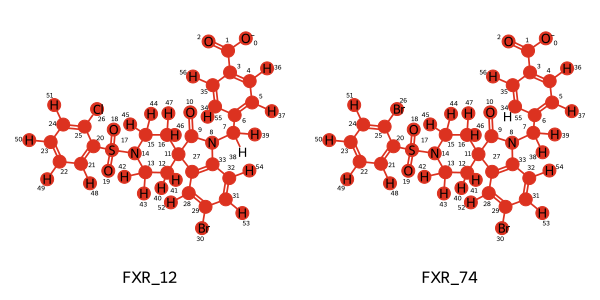

In [19]:
# Extract the relevant edge for the lig_ejm_31 -> lig_ejm_47 transform in the radial graph
FXR_74_to_FXR_12 = [edge for edge in mst_network.edges if edge.componentA.name == "FXR_12"][0]

FXR_74_to_FXR_12

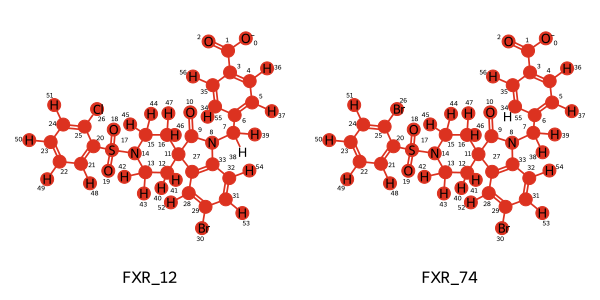

In [20]:
# Extract the relevant edge for the lig_ejm_31 -> lig_ejm_47 transform in the radial graph
FXR_12_to_FXR_74 = [edge for edge in mst_network.edges if edge.componentB.name == "FXR_74"][0]

FXR_12_to_FXR_74

In [21]:
# Let's create the four ChemicalSystems
from openfe import ChemicalSystem

# ejm_31_complex = ChemicalSystem({'ligand': ejm_31_to_ejm_47.componentA,
#                                   'solvent': solvent,
#                                   'protein': protein,},
#                                name=ejm_31_to_ejm_47.componentA.name)
FXR_12_solvent = ChemicalSystem({'ligand': FXR_12_to_FXR_74.componentA,
                                  'solvent': solvent,},
                               name=FXR_12_to_FXR_74.componentA.name)

# ejm_47_complex = ChemicalSystem({'ligand': ejm_31_to_ejm_47.componentB,
#                                  'solvent': solvent,
#                                  'protein': protein,},
#                                name=ejm_31_to_ejm_47.componentB.name)
FXR_74_solvent = ChemicalSystem({'ligand': FXR_12_to_FXR_74.componentB,
                                 'solvent': solvent,},
                               name=FXR_12_to_FXR_74.componentB.name)

In [22]:
from openfe.protocols.openmm_rfe import RelativeHybridTopologyProtocol
from openff.units import unit

# Create the solvent settings
solvent_rbfe_settings = RelativeHybridTopologyProtocol.default_settings()
solvent_rbfe_settings.simulation_settings.equilibration_length = 10 * unit.picosecond # Reduce equilibration length to 10 picoseconds
solvent_rbfe_settings.simulation_settings.production_length = 50 * unit.picosecond # Reduce prodution length to 50 picoseconds
solvent_rbfe_settings.engine_settings.compute_platform = None  # default is to look for CUDA, none allows falling back to OpenCL or CPU

# Create the complex settings
# complex_rbfe_settings = RelativeHybridTopologyProtocol.default_settings()
# complex_rbfe_settings.simulation_settings.equilibration_length = 10 * unit.picosecond # Reduce equilibration length to 10 picoseconds
# complex_rbfe_settings.simulation_settings.production_length = 50 * unit.picosecond # Reduce prodution length to 50 picoseconds
# complex_rbfe_settings.solvation_settings.solvent_padding = 1 * unit.nanometer
# complex_rbfe_settings.engine_settings.compute_platform = None  # default is to look for CUDA, none allows falling back to OpenCL or CPU

# For context, let's display the complex simulation settings!
# complex_rbfe_settings.simulation_settings

solvent_rbfe_settings.simulation_settings


{'early_termination_target_error': {'unit': 'kilocalorie_per_mole', 'val': 0.0},
 'equilibration_length': {'unit': 'nanosecond', 'val': 0.009999999999999998},
 'minimization_steps': 5000,
 'n_replicas': 11,
 'production_length': {'unit': 'nanosecond', 'val': 0.04999999999999999},
 'real_time_analysis_interval': {'unit': 'picosecond', 'val': 250.0},
 'real_time_analysis_minimum_time': {'unit': 'picosecond', 'val': 500.0},
 'sampler_method': 'repex',
 'sams_flatness_criteria': 'logZ-flatness',
 'sams_gamma0': 1.0,
 'time_per_iteration': {'unit': 'picosecond', 'val': 2.5}}


In [23]:
# Create RBFE Protocol classes
solvent_rbfe_protocol = RelativeHybridTopologyProtocol(
    settings=solvent_rbfe_settings
)

# complex_rbfe_protocol = RelativeHybridTopologyProtocol(
#     settings=complex_rbfe_settings
# )

In [24]:
# transformation_complex = openfe.Transformation(
#             stateA=ejm_31_complex,
#             stateB=ejm_47_complex,
#             mapping=ejm_31_to_ejm_47,
#             protocol=complex_rbfe_protocol,  # use complex protocol created above
#             name=f"{ejm_31_complex.name}_{ejm_47_complex.name}_complex"
#         )

transformation_solvent = openfe.Transformation(
            stateA=FXR_12_solvent,
            stateB=FXR_74_solvent,
            mapping=FXR_12_to_FXR_74,
            protocol=solvent_rbfe_protocol,  # use solvent protocol created above
            name=f"{FXR_12_solvent.name}_{FXR_74_solvent.name}_solvent"
        )

In [25]:
# complex_dag = transformation_complex.create()

solvent_dag = transformation_solvent.create()



In [26]:
# complex dry-run
# complex_unit = list(complex_dag.protocol_units)[0]

# complex_unit.run(dry=True, verbose=True)

# solvent dry-run
solvent_unit = list(solvent_dag.protocol_units)[0]

solvent_unit.run(dry=True, verbose=True)




/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openff/utilities/provenance.py:26: CondaExecutableNotFoundWarning: No conda/mamba/micromamba executable found. Unable to determine package versions.
  warnings.warn(
/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openfe/protocols/openmm_rfe/equil_rfe_methods.py:1070: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  bfactors[np.in1d(selection_indices, list(hybrid_factory._atom_classes['unique_old_atoms']))] = 0.25  # lig A
/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openfe/protocols/openmm_rfe/equil_rfe_methods.py:1071: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  bfactors[np.in1d(selection_indices, list(hybrid_factory._atom_classes['core_atoms']))] = 0.50  # core
/home/craigv-z/micromamba/envs/openfe/lib/python3.12/site-packages/openfe/protocols/openmm_rfe/equil_rfe_methods.py:1072: DeprecationWarning: `in1d` is deprecated. Use `np.isin` 

Please cite the following:

        Friedrichs MS, Eastman P, Vaidyanathan V, Houston M, LeGrand S, Beberg AL, Ensign DL, Bruns CM, and Pande VS. Accelerating molecular dynamic simulations on graphics processing unit. J. Comput. Chem. 30:864, 2009. DOI: 10.1002/jcc.21209
        Eastman P and Pande VS. OpenMM: A hardware-independent framework for molecular simulations. Comput. Sci. Eng. 12:34, 2010. DOI: 10.1109/MCSE.2010.27
        Eastman P and Pande VS. Efficient nonbonded interactions for molecular dynamics on a graphics processing unit. J. Comput. Chem. 31:1268, 2010. DOI: 10.1002/jcc.21413
        Eastman P and Pande VS. Constant constraint matrix approximation: A robust, parallelizable constraint method for molecular simulations. J. Chem. Theor. Comput. 6:434, 2010. DOI: 10.1021/ct900463w
        Chodera JD and Shirts MR. Replica exchange and expanded ensemble simulations as Gibbs multistate: Simple improvements for enhanced mixing. J. Chem. Phys., 135:194110, 2011. DOI:10.1063/

{'debug': {'sampler': <instance of HybridRepexSampler>}}

In [27]:
import pathlib
# # first we create the directory
# transformation_dir = pathlib.Path("tyk2_json")
# transformation_dir.mkdir(exist_ok=True)

# # then we write out the transformations
# transformation_complex.to_json(transformation_dir / f"{transformation_complex.name}.json")
# transformation_solvent.to_json(transformation_dir / f"{transformation_solvent.name}.json")



INFO:openfe.utils.system_probe.log:SYSTEM CONFIG DETAILS:
INFO:openfe.utils.system_probe.log.hostname:hostname: 'craigv-z-Mobile'
INFO:openfe.utils.system_probe.log.gpu:CUDA-based GPU not found
INFO:openfe.utils.system_probe.log:Memory used: 8.1G (26.0%)
INFO:openfe.utils.system_probe.log:solvent/scratch_RelativeHybridTopologyProtocolUnit-de742cf1c5e141f2b94d533151b9d626_attempt_0: 8% full (1.4T free)
INFO:gufekey.openfe.protocols.openmm_rfe.equil_rfe_methods.RelativeHybridTopologyProtocolUnit:Preparing the hybrid topology simulation
INFO:gufekey.openfe.protocols.openmm_rfe.equil_rfe_methods.RelativeHybridTopologyProtocolUnit:Parameterizing molecules
INFO:openmmforcefields.generators.template_generators:Requested to generate parameters for residue <Residue 0 (UNK) of chain 0>
INFO:openmmforcefields.generators.template_generators:Generating a residue template for [H][c]1[c]([H])[c]([H])[c]([S](=[O])(=[O])[N]2[C]([H])([H])[C]([H])([H])[C]3([C](=[O])[N]([C]([H])([H])[c]4[c]([H])[c]([H])[c

Please cite the following:

        Friedrichs MS, Eastman P, Vaidyanathan V, Houston M, LeGrand S, Beberg AL, Ensign DL, Bruns CM, and Pande VS. Accelerating molecular dynamic simulations on graphics processing unit. J. Comput. Chem. 30:864, 2009. DOI: 10.1002/jcc.21209
        Eastman P and Pande VS. OpenMM: A hardware-independent framework for molecular simulations. Comput. Sci. Eng. 12:34, 2010. DOI: 10.1109/MCSE.2010.27
        Eastman P and Pande VS. Efficient nonbonded interactions for molecular dynamics on a graphics processing unit. J. Comput. Chem. 31:1268, 2010. DOI: 10.1002/jcc.21413
        Eastman P and Pande VS. Constant constraint matrix approximation: A robust, parallelizable constraint method for molecular simulations. J. Chem. Theor. Comput. 6:434, 2010. DOI: 10.1021/ct900463w
        Chodera JD and Shirts MR. Replica exchange and expanded ensemble simulations as Gibbs multistate: Simple improvements for enhanced mixing. J. Chem. Phys., 135:194110, 2011. DOI:10.1063/

INFO:gufekey.openfe.protocols.openmm_rfe.equil_rfe_methods.RelativeHybridTopologyProtocolUnit:Running equilibration phase
INFO:openmmtools.multistate.multistatesampler:Equilibration iteration 1/4
INFO:openmmtools.multistate.multistatesampler:Iteration took 18.338s.
INFO:openmmtools.multistate.multistatesampler:Estimated completion (of equilibration only) in 0:00:55.015236, at Mon Dec 22 16:00:20 2025 (consuming total wall clock time 0:01:13.353648).
INFO:openmmtools.multistate.multistatesampler:Equilibration iteration 2/4
INFO:openmmtools.multistate.multistatesampler:Iteration took 19.050s.
INFO:openmmtools.multistate.multistatesampler:Estimated completion (of equilibration only) in 0:00:37.389930, at Mon Dec 22 16:00:21 2025 (consuming total wall clock time 0:01:14.779861).
INFO:openmmtools.multistate.multistatesampler:Equilibration iteration 3/4
INFO:openmmtools.multistate.multistatesampler:Iteration took 19.263s.
INFO:openmmtools.multistate.multistatesampler:Estimated completion (of

Please cite the following:

        Friedrichs MS, Eastman P, Vaidyanathan V, Houston M, LeGrand S, Beberg AL, Ensign DL, Bruns CM, and Pande VS. Accelerating molecular dynamic simulations on graphics processing unit. J. Comput. Chem. 30:864, 2009. DOI: 10.1002/jcc.21209
        Eastman P and Pande VS. OpenMM: A hardware-independent framework for molecular simulations. Comput. Sci. Eng. 12:34, 2010. DOI: 10.1109/MCSE.2010.27
        Eastman P and Pande VS. Efficient nonbonded interactions for molecular dynamics on a graphics processing unit. J. Comput. Chem. 31:1268, 2010. DOI: 10.1002/jcc.21413
        Eastman P and Pande VS. Constant constraint matrix approximation: A robust, parallelizable constraint method for molecular simulations. J. Chem. Theor. Comput. 6:434, 2010. DOI: 10.1021/ct900463w
        Chodera JD and Shirts MR. Replica exchange and expanded ensemble simulations as Gibbs multistate: Simple improvements for enhanced mixing. J. Chem. Phys., 135:194110, 2011. DOI:10.1063/

INFO:gufekey.openfe.protocols.openmm_rfe.equil_rfe_methods.RelativeHybridTopologyProtocolUnit:Running equilibration phase
INFO:openmmtools.multistate.multistatesampler:Equilibration iteration 1/4
INFO:openmmtools.multistate.multistatesampler:Iteration took 18.012s.
INFO:openmmtools.multistate.multistatesampler:Estimated completion (of equilibration only) in 0:00:54.036828, at Mon Dec 22 16:13:19 2025 (consuming total wall clock time 0:01:12.049104).
INFO:openmmtools.multistate.multistatesampler:Equilibration iteration 2/4
INFO:openmmtools.multistate.multistatesampler:Iteration took 18.832s.
INFO:openmmtools.multistate.multistatesampler:Estimated completion (of equilibration only) in 0:00:36.844952, at Mon Dec 22 16:13:20 2025 (consuming total wall clock time 0:01:13.689904).
INFO:openmmtools.multistate.multistatesampler:Equilibration iteration 3/4
INFO:openmmtools.multistate.multistatesampler:Iteration took 18.949s.
INFO:openmmtools.multistate.multistatesampler:Estimated completion (of

Please cite the following:

        Friedrichs MS, Eastman P, Vaidyanathan V, Houston M, LeGrand S, Beberg AL, Ensign DL, Bruns CM, and Pande VS. Accelerating molecular dynamic simulations on graphics processing unit. J. Comput. Chem. 30:864, 2009. DOI: 10.1002/jcc.21209
        Eastman P and Pande VS. OpenMM: A hardware-independent framework for molecular simulations. Comput. Sci. Eng. 12:34, 2010. DOI: 10.1109/MCSE.2010.27
        Eastman P and Pande VS. Efficient nonbonded interactions for molecular dynamics on a graphics processing unit. J. Comput. Chem. 31:1268, 2010. DOI: 10.1002/jcc.21413
        Eastman P and Pande VS. Constant constraint matrix approximation: A robust, parallelizable constraint method for molecular simulations. J. Chem. Theor. Comput. 6:434, 2010. DOI: 10.1021/ct900463w
        Chodera JD and Shirts MR. Replica exchange and expanded ensemble simulations as Gibbs multistate: Simple improvements for enhanced mixing. J. Chem. Phys., 135:194110, 2011. DOI:10.1063/

INFO:gufekey.openfe.protocols.openmm_rfe.equil_rfe_methods.RelativeHybridTopologyProtocolUnit:Running equilibration phase
INFO:openmmtools.multistate.multistatesampler:Equilibration iteration 1/4
INFO:openmmtools.multistate.multistatesampler:Iteration took 17.506s.
INFO:openmmtools.multistate.multistatesampler:Estimated completion (of equilibration only) in 0:00:52.518205, at Mon Dec 22 16:26:20 2025 (consuming total wall clock time 0:01:10.024274).
INFO:openmmtools.multistate.multistatesampler:Equilibration iteration 2/4
INFO:openmmtools.multistate.multistatesampler:Iteration took 18.675s.
INFO:openmmtools.multistate.multistatesampler:Estimated completion (of equilibration only) in 0:00:36.181551, at Mon Dec 22 16:26:23 2025 (consuming total wall clock time 0:01:12.363103).
INFO:openmmtools.multistate.multistatesampler:Equilibration iteration 3/4
INFO:openmmtools.multistate.multistatesampler:Iteration took 18.964s.
INFO:openmmtools.multistate.multistatesampler:Estimated completion (of

KeyboardInterrupt: 

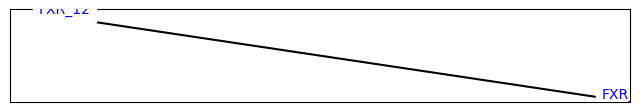

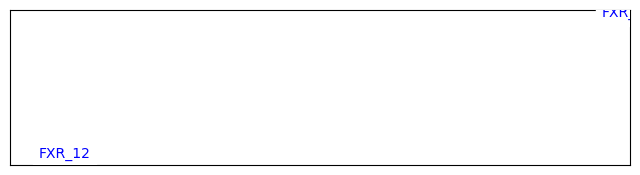

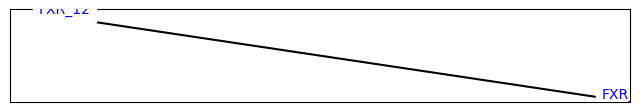

In [32]:
import pathlib
from openfe import execute_DAG
# Finally we can run the simulations
# complex_path = pathlib.Path('./complex')
# complex_path.mkdir()

# First the complex transformation
# complex_dag_results = execute_DAG(complex_dag, scratch_basedir=complex_path, shared_basedir=complex_path)

# Next the solvent state transformation
solvent_path = pathlib.Path('./solvent')
solvent_path.mkdir()

solvent_dag_results = execute_DAG(solvent_dag, scratch_basedir=solvent_path, shared_basedir=solvent_path)

# Get the complex and solvent results
# complex_results = rbfe_protocol.gather([complex_dag_results])
solvent_results = solvent_rbfe_protocol.gather([solvent_dag_results])

# print(f"Complex dG: {complex_results.get_estimate()}, err {complex_results.get_uncertainty()}")
print(f"Solvent dG: {solvent_results.get_estimate()}, err {solvent_results.get_uncertainty()}")